# State of Charge Estimation of Li-ion Batteries using Extended Kalman Filter

## Cell Model

## Extended Kalman Filter Equations

In [1]:
from src.extendedKF import extendedKFBatt
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib widget

## Available drive cycles from dataset: choose as filename

In [2]:
[file for file in os.listdir('data/') if not "degC" in file]

['552_Mixed5.csv',
 '549_HPPC.csv',
 '552_Mixed6.csv',
 '551_Mixed2.csv',
 '552_Mixed7.csv',
 '551_LA92.csv',
 '551_Mixed1.csv',
 '551_US06.csv',
 '552_Mixed4.csv',
 '552_Mixed8.csv',
 '552_Mixed3.csv',
 '551_UDDS.csv']

## Run Kalman Filter
- Initial state estimates:
    - SOC: 0.0 (All drive cycles actually start at 1.0)
    - Irc1: 0.0
    - Irc2: 0.0
- Inital state covariances:
    - SOC: 1e-5
    - Irc1: 1e-5
    - Irc2: 1e-5
- Process noise:
    - SOC: 1e1
    - Irc1: 1e2
    - Irc2: 1e1
- Sensor noise covariance:
    - sigmaV: 1e-3 (applied to both input current and measured voltage)

In [3]:
filename = "551_LA92.csv"
N = np.inf
obj = extendedKFBatt(N, filename)
obj.iterKF()

Voltage prediction CRMSE =  0.006815268040904744


## Cell Parameters

In [4]:
obj.dfCellParamsOpti

,r0,r1,r2,c1,c2
0,0.019414,0.656103,0.014601,82719.773966,1360.246886


## OCV-SOC curve of cell

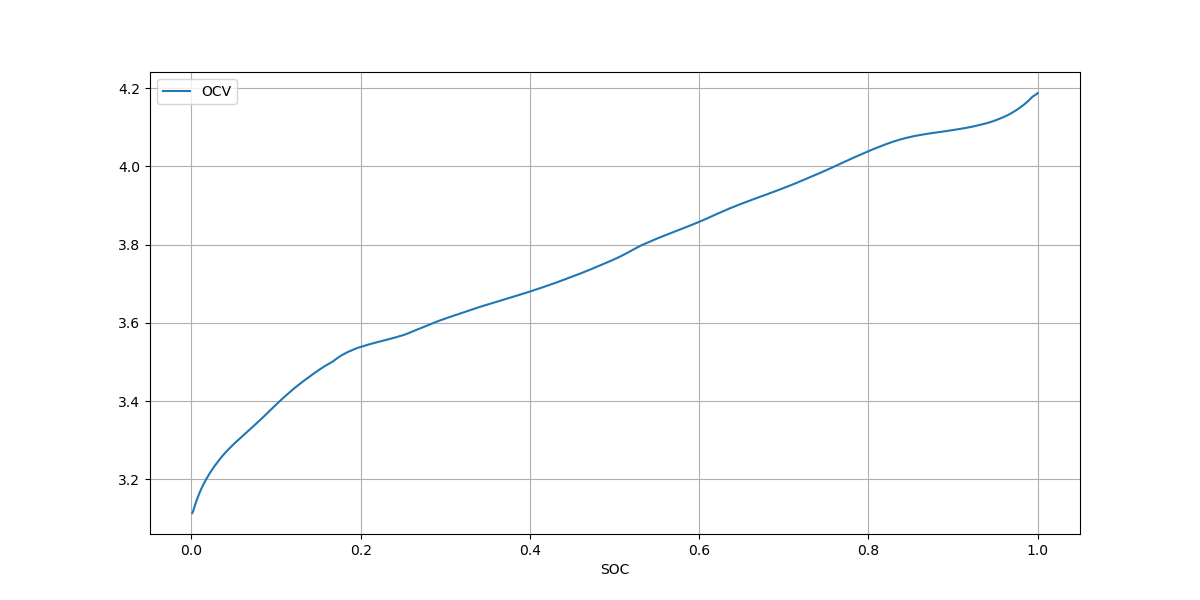

In [5]:
fig1, ax1 = plt.subplots(figsize=(12,6))
obj.dfOCV.plot.line(x='SOC', y='OCV', ax=ax1)
plt.grid()

## Available data from Kalman Filter run in storeDF dataframe

In [6]:
obj.storeDF.columns

Index(['SOC', 'Irc1', 'Irc2', 'socSigma', 'Irc1Sigma', 'Irc2Sigma', 'I', 'V',
       'yHat', 'VOCV', 'Innovation', 'dOCVSOC', 'yHatKF'],
      dtype='object')

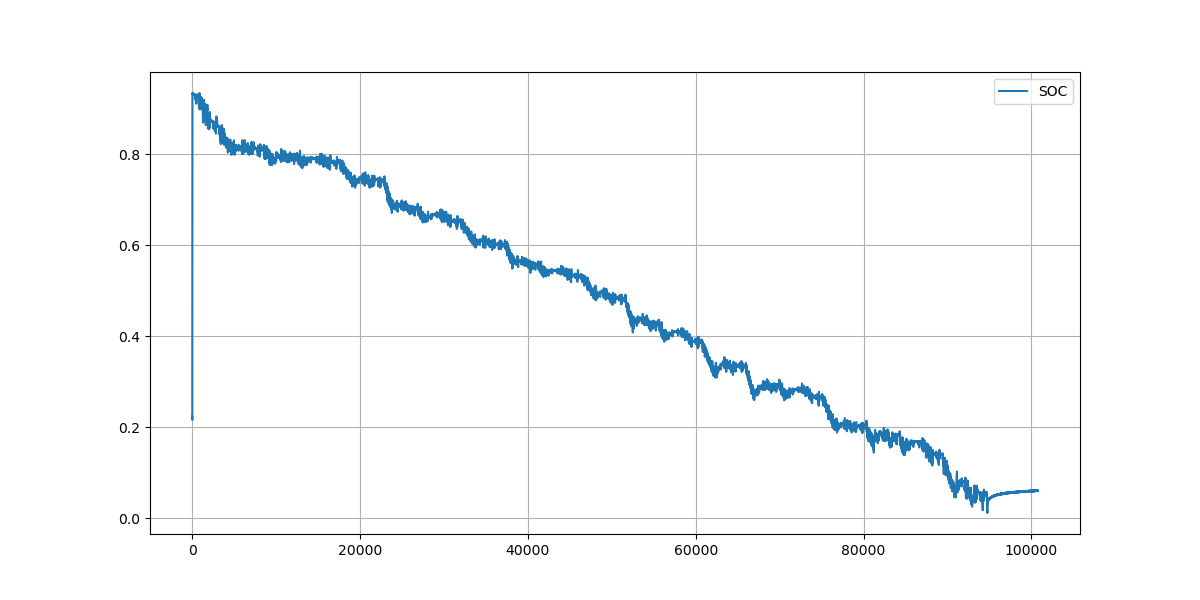

In [7]:
fig2, ax1 = plt.subplots(figsize=(12,6))
obj.storeDF.plot(y=['SOC'], ax=ax1)
plt.grid()

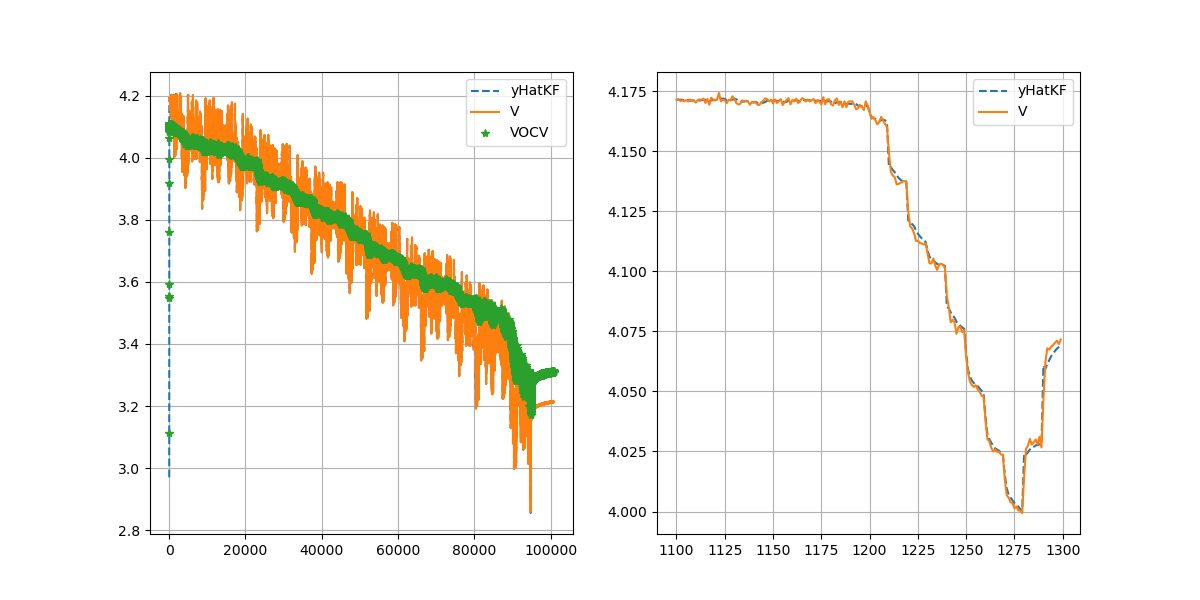

In [8]:
fig3 = plt.figure(figsize=(12,6))
ax1 = fig3.add_subplot(121)
obj.storeDF.plot(y=['yHatKF', 'V', 'VOCV'], style=['--', '-', '*'], ax=ax1)
plt.grid()
ax2 = fig3.add_subplot(122)
obj.storeDF.iloc[1100:1300].plot(y=['yHatKF', 'V'], style=['--', '-'], ax=ax2)
plt.grid()

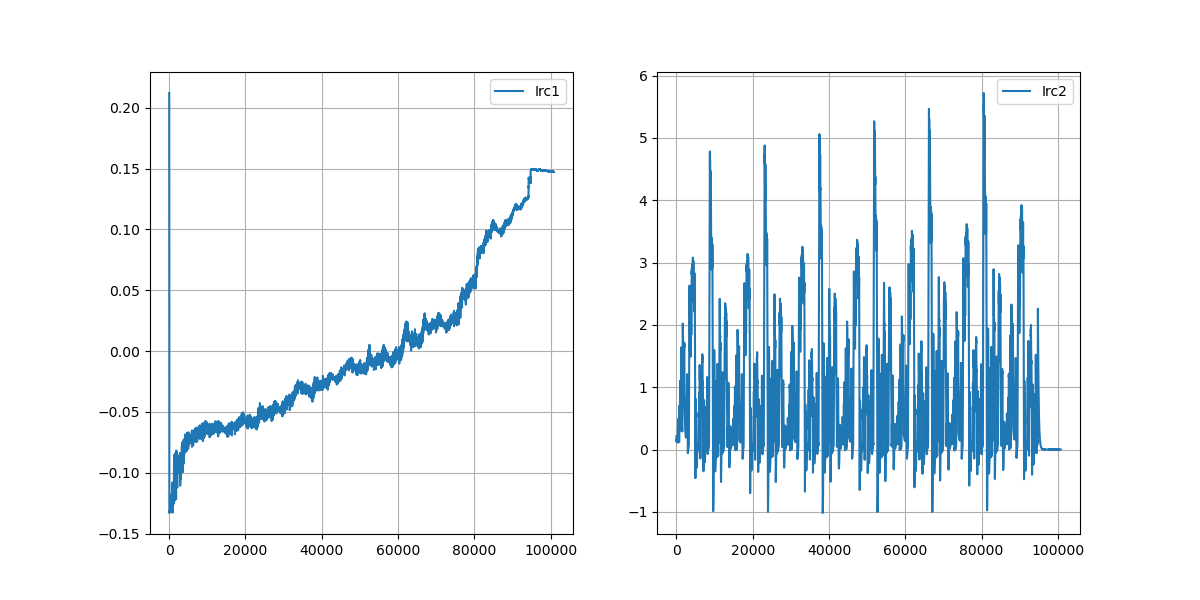

In [9]:
fig4 = plt.figure(figsize=(12,6))
ax1 = fig4.add_subplot(121)
obj.storeDF.plot(y=['Irc1'], ax=ax1)
plt.grid()
ax2 = fig4.add_subplot(122)
obj.storeDF.plot(y=['Irc2'], ax=ax2)
plt.grid()

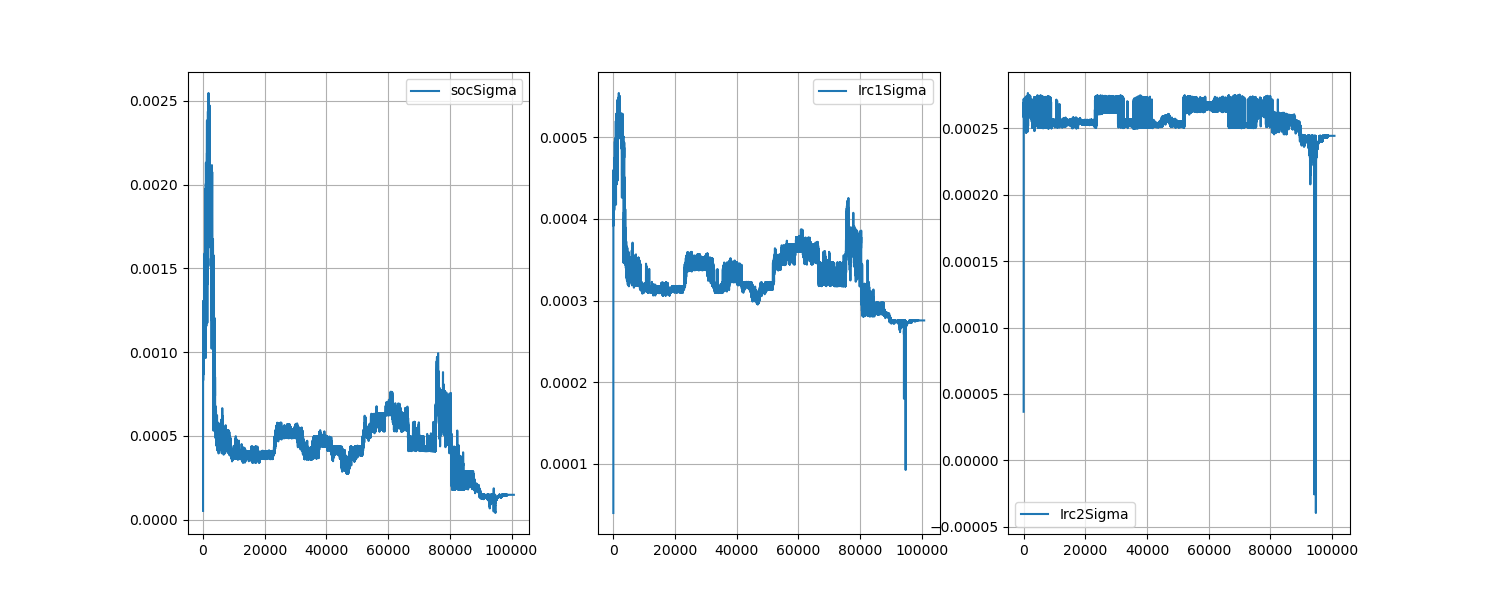

In [10]:
fig5 = plt.figure(figsize=(15,6))
ax1 = fig5.add_subplot(131)
obj.storeDF.plot(y=['socSigma'], ax=ax1)
plt.grid()
ax2 = fig5.add_subplot(132)
obj.storeDF.plot(y=['Irc1Sigma'], ax=ax2)
plt.grid()
ax3 = fig5.add_subplot(133)
obj.storeDF.plot(y=['Irc2Sigma'], ax=ax3)
plt.grid()

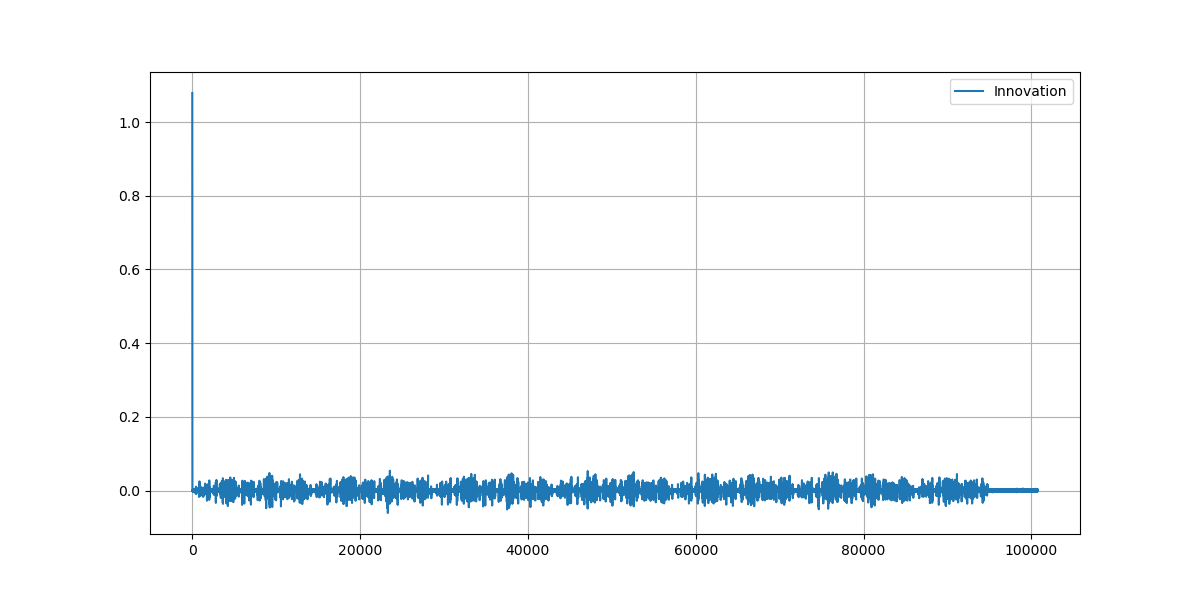

In [11]:
fig6, ax1 = plt.subplots(figsize=(12,6))
obj.storeDF.plot(y=['Innovation'], ax=ax1)
plt.grid()

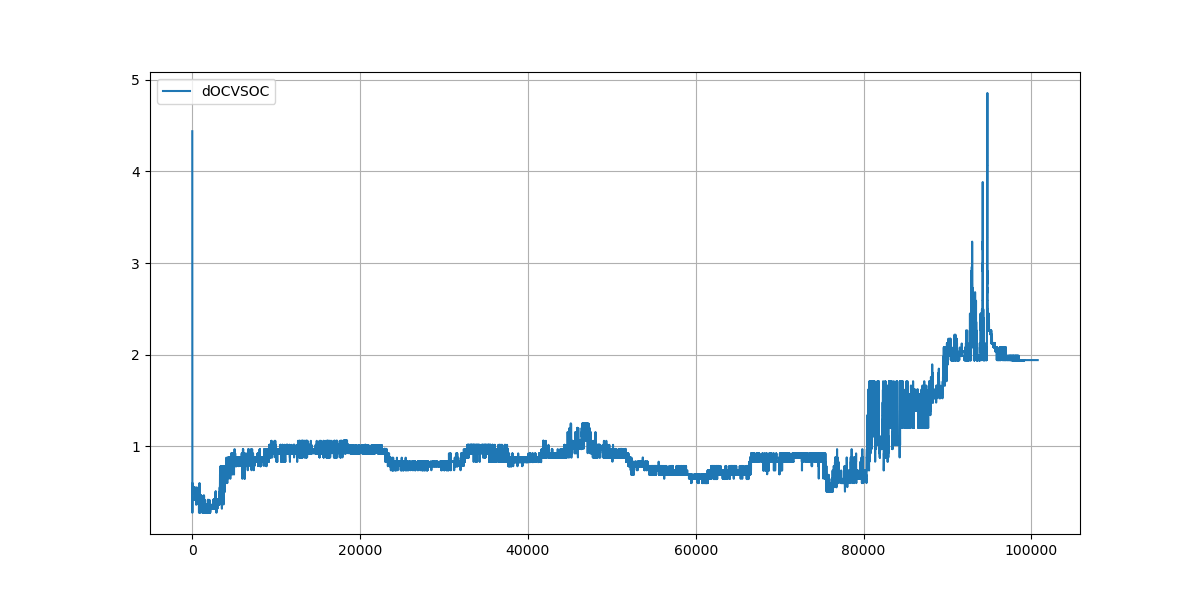

In [12]:
fig7, ax1 = plt.subplots(figsize=(12,6))
obj.storeDF.plot(y=['dOCVSOC'], ax=ax1)
plt.grid()